In [3]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Its target labels range from zero to nine as follows:<br>
<ul>
    <li>0 : T-shirt</li>
    <li>1 : pants</li>
    <li>2 : sweather</li>
    <li>3 : dress</li>
    <li>4 : coat</li>
    <li>5 : sandals</li>
    <li>6 : shirt</li>
    <li>7 : sneakers</li>
    <li>8 : bag</li>
    <li>9 : boots</li>
</ul>

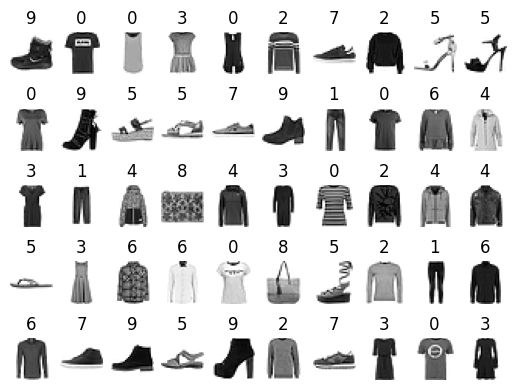

In [26]:
# we can plot the samples with their lables
import matplotlib.pyplot as plt
fig, axs = plt.subplots(5,10)
for i in range(50):
    axs[i//10][i%10].imshow(train_input[i], cmap='gray_r')
    axs[i//10][i%10].axis('off')
    axs[i//10][i%10].set_title(train_target[i])
plt.show()

In [28]:
train_input[0] # this is an bitmap image
print(train_input[0].shape)

(28, 28)


In [30]:
# classification with the use of logistic regression
train_scaled = train_input/255.0
train_scaled = train_scaled.reshape(-1, 28*28)

from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)

import numpy as np
np.mean(scores['test_score'])

0.8192833333333333

In [37]:
# change the number of iterations
iter_list = []
score_list = []
for i in range(1,11):
    sc = SGDClassifier(loss='log_loss', max_iter=5*i, random_state=42)
    scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
    iter_list.append(5*i)
    score_list.append(np.mean(scores['test_score']))

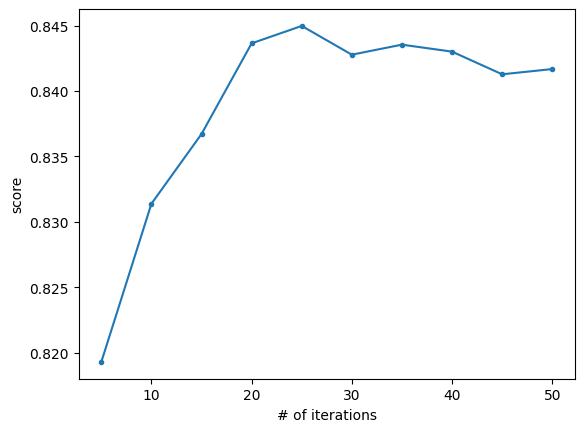

In [42]:
plt.plot(iter_list, score_list,'.-')
plt.xlabel('# of iterations')
plt.ylabel('score')
plt.show()

In [43]:
# classification with the use of ANN
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [49]:
model = keras.Sequential()
model.add(keras.layers.Dense(10, activation='softmax', input_shape=(784,)))
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)
model.evaluate(val_scaled, val_target) # loss and accuracy printed

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 911us/step - accuracy: 0.7280 - loss: 0.7922
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 936us/step - accuracy: 0.8346 - loss: 0.4900
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step - accuracy: 0.8445 - loss: 0.4546
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - accuracy: 0.8517 - loss: 0.4412
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step - accuracy: 0.8519 - loss: 0.4419
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8499 - loss: 0.4403


[0.45062682032585144, 0.8485833406448364]

In [50]:
# to improve its performance, add an layer
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)
model.evaluate(val_scaled, val_target) # improved

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7555 - loss: 0.7724
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8501 - loss: 0.4239
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8625 - loss: 0.3829
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8708 - loss: 0.3571
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8790 - loss: 0.3359
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8755 - loss: 0.3461


[0.35070621967315674, 0.8724166750907898]

In [51]:
# change the activation function to relu
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)
model.evaluate(val_scaled, val_target) # improved

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7678 - loss: 0.6765
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8565 - loss: 0.4053
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8690 - loss: 0.3636
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8800 - loss: 0.3302
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8884 - loss: 0.3130
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8781 - loss: 0.3535


[0.35900434851646423, 0.874750018119812]

In [52]:
# use adam the optimizer
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)
model.evaluate(val_scaled, val_target) # improved

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7726 - loss: 0.6604
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8537 - loss: 0.4055
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8703 - loss: 0.3595
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8797 - loss: 0.3291
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8864 - loss: 0.3112
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8724 - loss: 0.3534


[0.3540381193161011, 0.8731666803359985]

In [54]:
# use adam the optimizer
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dense(100, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)
model.evaluate(val_scaled, val_target) # improved

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7684 - loss: 0.6675
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8587 - loss: 0.3840
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8707 - loss: 0.3433
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8830 - loss: 0.3168
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8919 - loss: 0.2943
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8752 - loss: 0.3526


[0.352344810962677, 0.8740000128746033]

In [68]:
# use adam the optimizer
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dense(100, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dense(50, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=10, verbose=0)
model.evaluate(val_scaled, val_target) # improved

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8873 - loss: 0.3253


[0.3207244277000427, 0.8865833282470703]

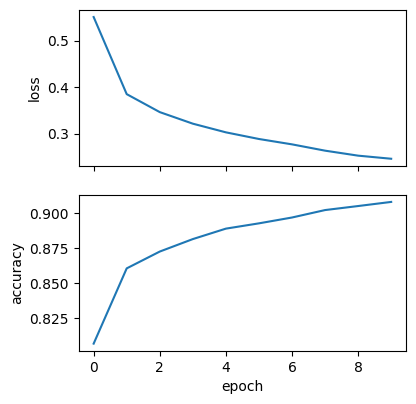

In [69]:
fig, axs = plt.subplots(2, sharex=True, figsize=(4,4))
plt.tight_layout()
axs[0].plot(history.history['loss'])
axs[0].set_ylabel('loss')
axs[1].plot(history.history['accuracy'])
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('accuracy')
plt.show()

In [72]:
# use adam the optimizer
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dense(100, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dense(50, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8860 - loss: 0.3581


[0.3529863953590393, 0.8889166712760925]

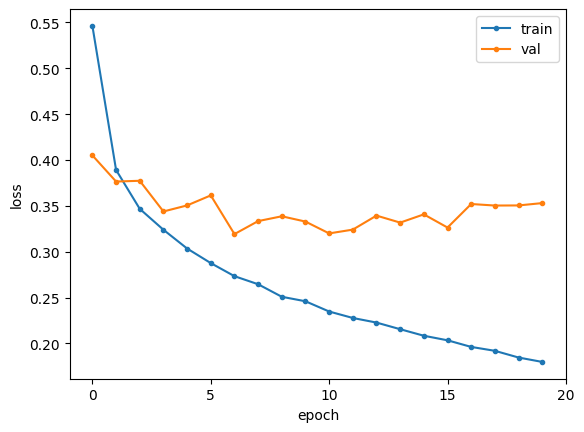

In [79]:
plt.plot(history.history['loss'],'.-')
plt.plot(history.history['val_loss'],'.-')
plt.xticks(range(0,21,5))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show() # epoch ~ 6 appears to be the best

In [80]:
# dropout to avoid overfitting
# inserted after the second dense layer
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dense(100, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(50, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8879 - loss: 0.3477


[0.35522007942199707, 0.887666642665863]

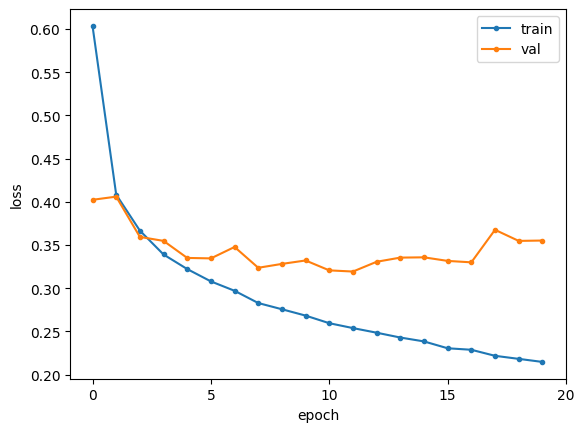

In [81]:
plt.plot(history.history['loss'],'.-')
plt.plot(history.history['val_loss'],'.-')
plt.xticks(range(0,21,5))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show() # epoch ~ 6 appears to be the best

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8882 - loss: 0.3048


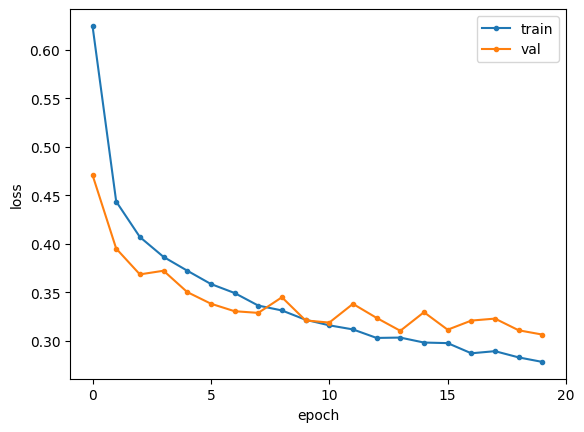

In [82]:
# dropout to avoid overfitting
# inserted after the first dense layer
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(100, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dense(50, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
model.evaluate(val_scaled, val_target)

plt.plot(history.history['loss'],'.-')
plt.plot(history.history['val_loss'],'.-')
plt.xticks(range(0,21,5))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show() # epoch ~ 6 appears to be the best

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8775 - loss: 0.3355


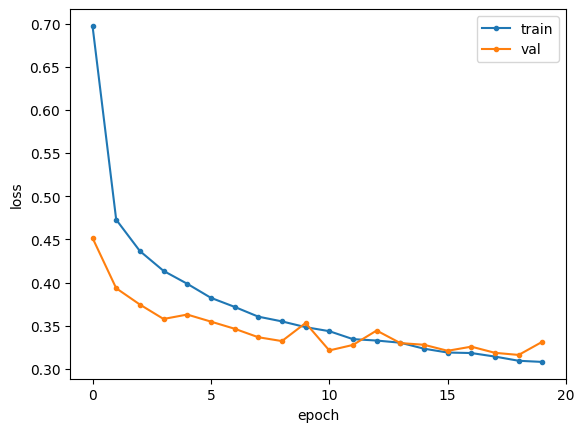

In [83]:
# dropout to avoid overfitting
# inserted after both layers
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(100, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(50, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
model.evaluate(val_scaled, val_target)

plt.plot(history.history['loss'],'.-')
plt.plot(history.history['val_loss'],'.-')
plt.xticks(range(0,21,5))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show() # epoch ~ 6 appears to be the best

In [85]:
# save the model for later use
model.save_weights('mnist_model.weights.h5')